***Importing the dependencies***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

***Data Collection and Processing***

In [7]:
#Load the dataset
big_mart_df = pd.read_csv(r"C:\Users\shaik\Downloads\big_mart_data.csv")

In [8]:
# first five rows of the dataframe
big_mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
# number of datapoints and no. of features
big_mart_df.shape

(8523, 12)

In [10]:
#Info about dataset
big_mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
big_mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Categorical features-
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size   
- Outlet_Location_Type
- Outlet_Type

In [12]:
# check for any duplicates
big_mart_df.duplicated().any()

False

In [13]:
# checking for null values
big_mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing values
- Mean(Avg.) for numerical data
- Mode for categorical data

In [14]:
big_mart_df['Item_Weight'].mean()

12.857645184135976

In [15]:
# filling the missing values in Item_Weight column with mean value
big_mart_df['Item_Weight']= big_mart_df['Item_Weight'].fillna(big_mart_df['Item_Weight'].mean())

In [16]:
# verifying
big_mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
# filling the missing values in outlet_size column
mode_of_outlet_size = big_mart_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [18]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [19]:
missing_values = big_mart_df['Outlet_Size'].isnull()

In [20]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [21]:
big_mart_df.loc[missing_values, 'Outlet_Size'] = big_mart_df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [22]:
# verifying
big_mart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

***Data Analysis***

In [23]:
big_mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [24]:
sns.set()

C:\Users\shaik\AppData\Local\Temp\ipykernel_36836\1394437290.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_df['Item_Weight'], color = 'red')


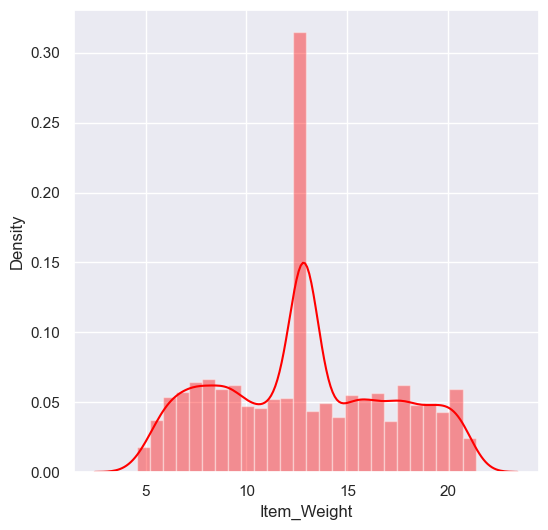

In [25]:
# Item Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_df['Item_Weight'], color = 'red')
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_36836\247472346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_df['Item_Visibility'], color = 'green')


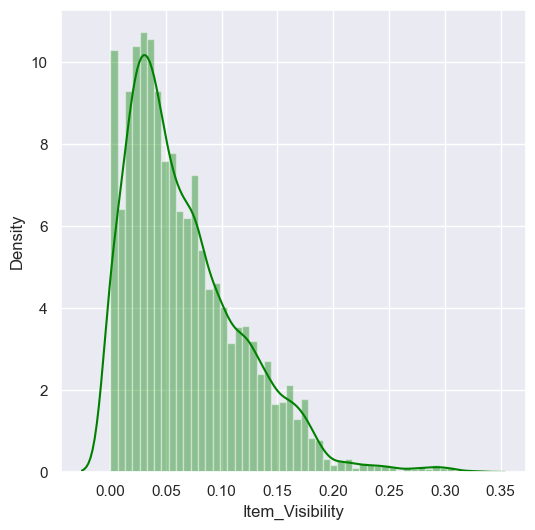

In [26]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_df['Item_Visibility'], color = 'green')
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_36836\3487468557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_df['Item_MRP'], color = 'blue')


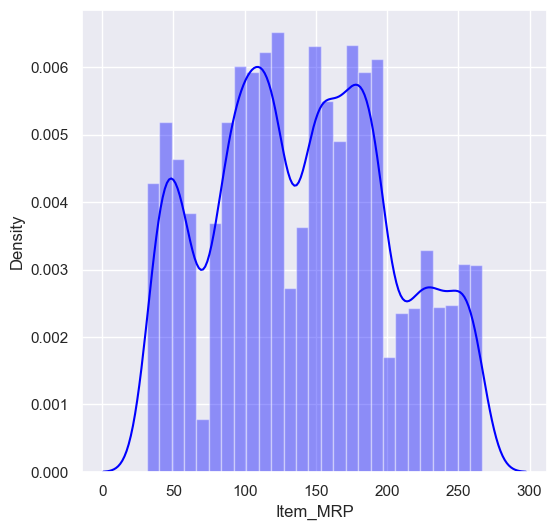

In [27]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_df['Item_MRP'], color = 'blue')
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_36836\3188147041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_df['Item_Outlet_Sales'], color = 'orange')


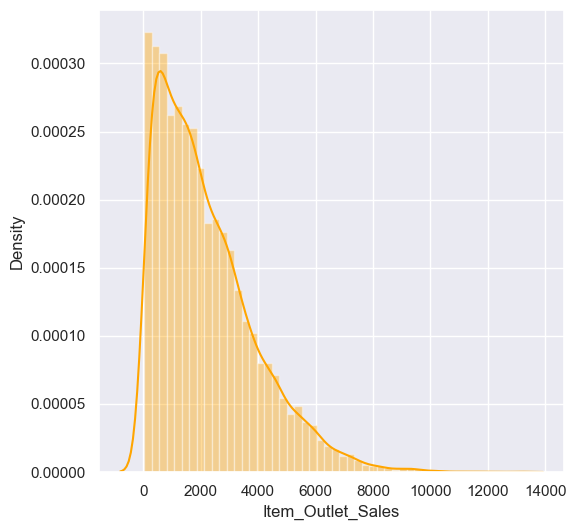

In [28]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_df['Item_Outlet_Sales'], color = 'orange')
plt.show()

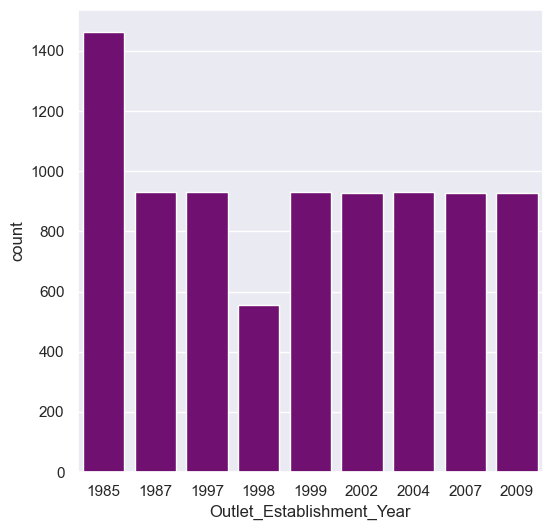

In [29]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(data = big_mart_df, x = 'Outlet_Establishment_Year', color ='purple')
plt.show()

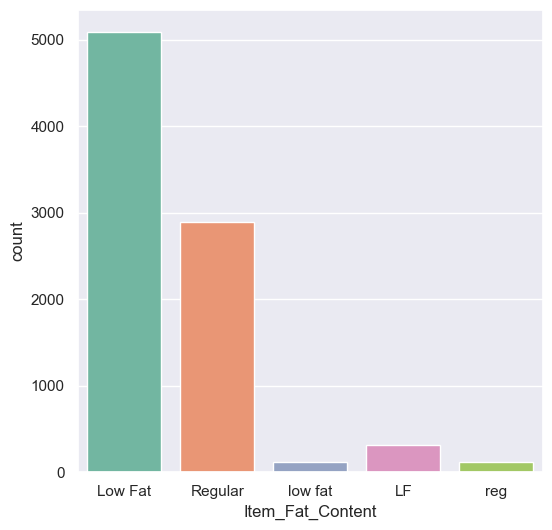

In [30]:
# Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(x = 'Item_Fat_Content', hue='Item_Fat_Content', data = big_mart_df, palette='Set2', legend= False)
plt.show()

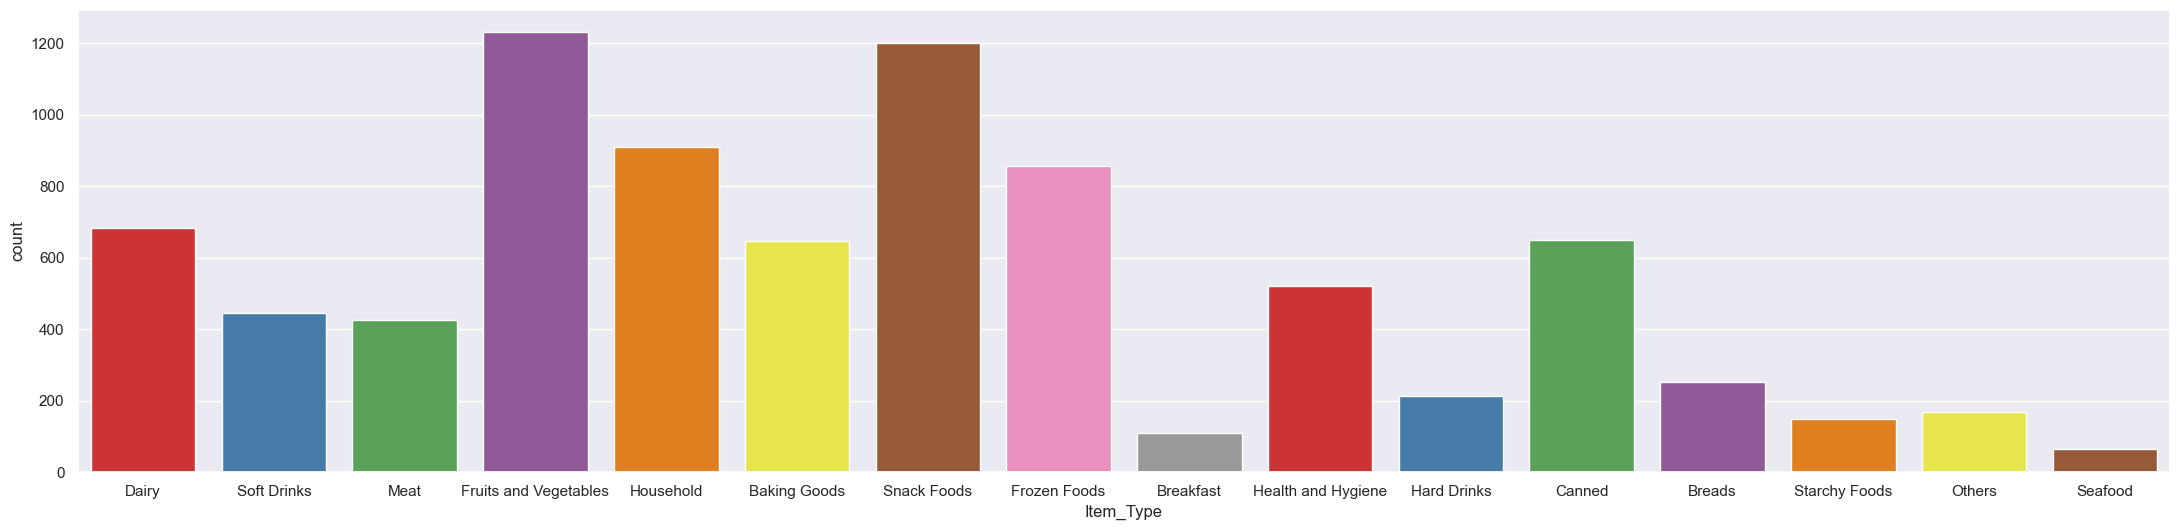

In [31]:
# Item_type
plt.figure(figsize=(27,6))
sns.countplot(x = 'Item_Type', hue='Item_Type', data = big_mart_df, palette='Set1', legend = False)
plt.show()

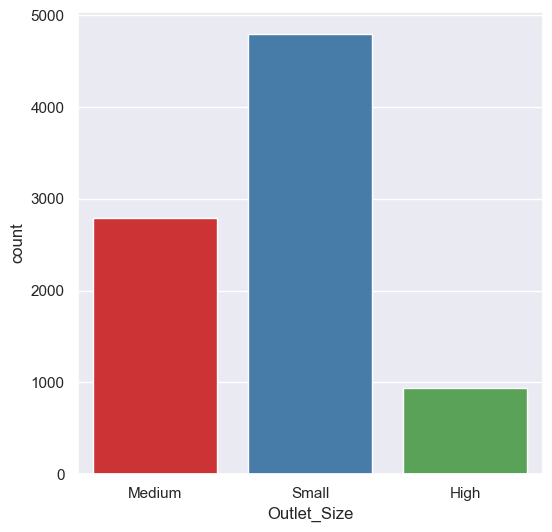

In [32]:
# Outlet_Size
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', hue='Outlet_Size', data=big_mart_df, palette='Set1', legend=False)
plt.show()

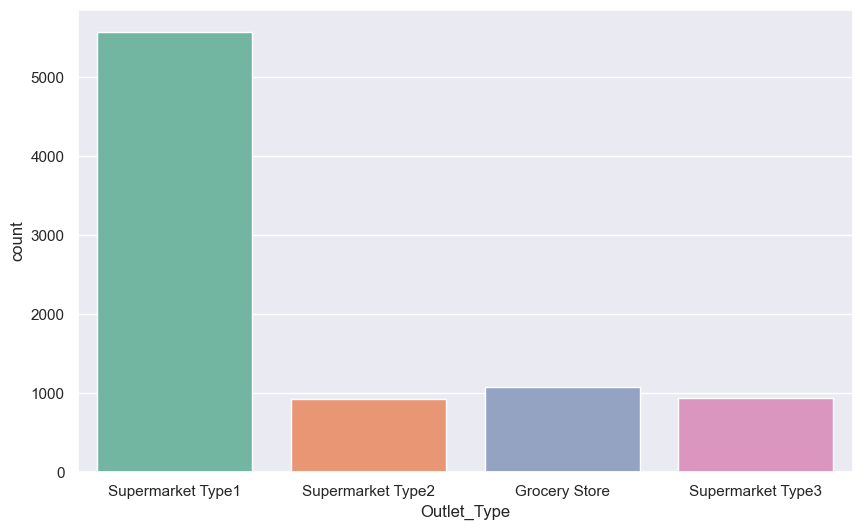

In [33]:
# Outlet_type
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type', hue='Outlet_Type', data=big_mart_df, palette='Set2', legend=False)
plt.show()

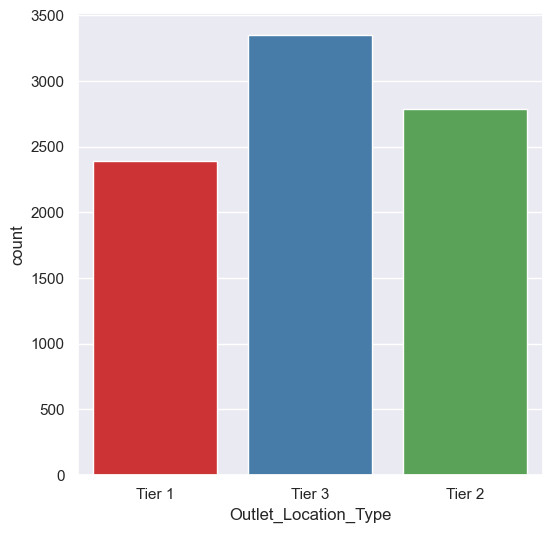

In [34]:
# Location_Type
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', hue='Outlet_Location_Type', data=big_mart_df, palette='Set1', legend=False)
plt.show()

***Data Pre-processing***

In [35]:
big_mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
big_mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [37]:
big_mart_df.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [38]:
big_mart_df['Item_Fat_Content'] = (
    big_mart_df['Item_Fat_Content']
    .str.strip()   # remove leading/trailing spaces
    .str.title()
)


In [39]:
# verifying
big_mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [40]:
# Strip leading/trailing spaces from categorical columns
big_mart_df['Outlet_Identifier'] = big_mart_df['Outlet_Identifier'].str.strip()
big_mart_df['Outlet_Size'] = big_mart_df['Outlet_Size'].str.strip()
big_mart_df['Outlet_Location_Type'] = big_mart_df['Outlet_Location_Type'].str.strip()
big_mart_df['Outlet_Type'] = big_mart_df['Outlet_Type'].str.strip()


***Label Encoding***

In [41]:
# To change the categorical values into labels
encoder_outlet_id = LabelEncoder()
encoder_outlet_size = LabelEncoder()
encoder_outlet_location = LabelEncoder()
encoder_outlet_type = LabelEncoder()
encoder = LabelEncoder()

In [42]:
big_mart_df['Item_Identifier'] = encoder.fit_transform(big_mart_df['Item_Identifier'])

In [43]:
# Similarly to all the other categorical values
big_mart_df['Item_Fat_Content'] = encoder.fit_transform(big_mart_df['Item_Fat_Content'])

big_mart_df['Item_Type'] = encoder.fit_transform(big_mart_df['Item_Type'])

big_mart_df['Outlet_Identifier'] = encoder_outlet_id.fit_transform(big_mart_df['Outlet_Identifier'])
big_mart_df['Outlet_Size'] = encoder_outlet_size.fit_transform(big_mart_df['Outlet_Size'])
big_mart_df['Outlet_Location_Type'] = encoder_outlet_location.fit_transform(big_mart_df['Outlet_Location_Type'])
big_mart_df['Outlet_Type'] = encoder_outlet_type.fit_transform(big_mart_df['Outlet_Type'])

In [44]:
big_mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


***splitting Features and Target***

In [45]:
X = big_mart_df.drop('Item_Outlet_Sales', axis=1)
Y = big_mart_df['Item_Outlet_Sales']

In [46]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [47]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [48]:
# splitting into training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [49]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


***Model Training***

**XGBoost Regressor**

In [50]:
from xgboost import XGBRegressor
reg = XGBRegressor()

In [51]:
reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

***Evaluation***

In [52]:
# Prediction on training data
y_train_prediction = reg.predict(x_train)


In [53]:
# R squared value
r2_train = metrics.r2_score(y_train, y_train_prediction)
print("R squared Value:", r2_train)

R squared Value: 0.8767038065269914


In [54]:
# prediction on test data
y_test_prediction = reg.predict(x_test)


In [55]:
r2_test = metrics.r2_score(y_test, y_test_prediction)
print("R Squared Error : ", r2_test)

R Squared Error :  0.524872071316624


In [56]:
MAE = metrics.mean_absolute_error(y_test, y_test_prediction)
print("Mean Absolute Error : ", MAE)

Mean Absolute Error :  791.1254956665389


This huge difference between training score and testing score shows `Overfitting`

Hyper_parameter Tuning

Using `RandomizedSearch`

In [57]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

param_dist = {
    'n_estimators': [200,500,800,1200],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3,4,5,6,8],
    'subsample': [0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5,0.7,0.8,1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 2, 5],
    'min_child_weight': [1,3,5,10]
}

rs = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
rs.fit(X, Y)
print(rs.best_params_, rs.best_score_)
best_model = rs.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.5} 0.5957120578741526


In [58]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [59]:

# Predictions
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

# R² Scores
train_r2 = metrics.r2_score(y_train, y_train_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train R²: 0.6121
Test R²: 0.6307


In [60]:
MAE_best = metrics.mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error : ", MAE_best)

Mean Absolute Error :  708.5082182065395


In [61]:
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':best_model.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
5,Item_MRP,0.286934
10,Outlet_Type,0.268956
6,Outlet_Identifier,0.127025
9,Outlet_Location_Type,0.094212
7,Outlet_Establishment_Year,0.092971
8,Outlet_Size,0.072071
3,Item_Visibility,0.016633
1,Item_Weight,0.015517
0,Item_Identifier,0.010221
4,Item_Type,0.008313


In [62]:
final_data = X.drop(columns=['Item_Weight', 'Item_Visibility', 'Item_Identifier', 'Item_Type', 'Item_Fat_Content'], axis=1)

In [63]:
final_data.head()

,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,249.8092,9,1999,1,0,1
1,48.2692,3,2009,1,2,2
2,141.6180,9,1999,1,0,1
3,182.0950,0,1998,2,2,0
4,53.8614,1,1987,0,2,1


***Final Model and predictive system***

In [64]:
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.5,
    'reg_alpha': 1,
    'n_estimators': 800,
    'min_child_weight': 5,
    'max_depth': 3,
    'learning_rate': 0.01,
    'colsample_bytree': 0.5,
    'random_state': 42
}


In [65]:
final_model = XGBRegressor(**best_params)

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data, Y, test_size=0.2, random_state=42)

In [67]:
final_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [68]:
y_pred = final_model.predict(X_test)

In [69]:
MAE_final = metrics.mean_absolute_error(y_pred, Y_test)
print("Mean Absolute Error : ", MAE_final)

Mean Absolute Error :  719.7136892121968


**Saving model using Joblib**

In [70]:
import joblib

In [71]:
joblib.dump(final_model, 'bigmart_model.pkl')

['bigmart_model.pkl']

In [73]:
model = joblib.load('bigmart_model.pkl')

**Prediction **

In [154]:
import pandas as pd

# real training feature order
feature_order = ['Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
                 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

def predict_sales():
    print("Enter the following details:")
    item_mrp = float(input("Item MRP: ").strip())
    outlet_id = input("Outlet Identifier: ").strip()
    outlet_year = int(input("Outlet Establishment Year: ").strip())
    outlet_size = input("Outlet Size: ").strip()
    outlet_location = input("Outlet Location Type: ").strip()
    outlet_type = input("Outlet Type: ").strip()

    # Encode using existing encoders
    try:
        outlet_id_enc = encoder_outlet_id.transform([outlet_id])[0]
        outlet_size_enc = encoder_outlet_size.transform([outlet_size])[0]
        outlet_location_enc = encoder_outlet_location.transform([outlet_location])[0]
        outlet_type_enc = encoder_outlet_type.transform([outlet_type])[0]
    except ValueError as e:
        print(f"Error: {e}")
        print("Make sure your input matches the categories in training data (case-sensitive).")
        return

    # Prepare DataFrame in exact training order
    input_df = pd.DataFrame([[item_mrp, outlet_id_enc, outlet_year,
                              outlet_size_enc, outlet_location_enc, outlet_type_enc]],
                            columns=feature_order)

    # Predict
    predicted_sales = model.predict(input_df)[0]
    print(f"\nPredicted Sales Price: ₹{predicted_sales:.2f}")

# Run the predictive system
predict_sales()


Enter the following details:
Item MRP: 53.8614
Outlet Identifier: OUT013
Outlet Establishment Year: 1987
Outlet Size: High
Outlet Location Type: Tier 3
Outlet Type: Supermarket Type1

Predicted Sales Price: ₹954.52
